In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [2]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 66% 17.0M/25.7M [00:02<00:01, 7.45MB/s]
100% 25.7M/25.7M [00:02<00:00, 11.6MB/s]


In [3]:
!unzip \*.zip && rm *.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [4]:
df = pd.read_csv('/content/IMDB Dataset.csv',encoding = "ISO-8859-1")

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.shape

(50000, 2)

In [7]:
df.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [8]:
df['len'] = df['review'].apply(len)

In [9]:
df.head()

,review,sentiment,len
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [10]:
print(df['len'].max())
print(df['len'].min())

13704
32


In [11]:
df['sentiment'] = df['sentiment'].replace({'negative' : 0,'positive' : 1})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
 2   len        50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [13]:
df.describe()

,sentiment,len
count,50000.000000,50000.00000
mean,0.500000,1309.67016
std,0.500005,990.02418
min,0.000000,32.00000
25%,0.000000,699.00000
50%,0.500000,971.00000
75%,1.000000,1591.00000
max,1.000000,13704.00000


In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [15]:
from nltk import word_tokenize 
from nltk.corpus import stopwords

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Length Histogram')

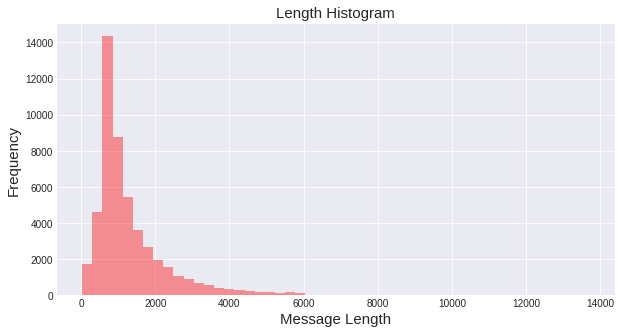

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
sns.distplot(df['len'],kde=False,color='red',hist=True)
plt.xlabel("Message Length",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Length Histogram",size=15)

In [17]:
from nltk.stem.porter import PorterStemmer
import re

In [19]:
ps = PorterStemmer() #pour "text preprocessing"

message = []

for i in range(0, df.shape[0]):
    #accepter que les mots alphabétiques
    review = re.sub('[^a-zA-Z]', ' ', df['review'][i])
    #convertir tous minuscule
    review = review.lower()
    #splitter chaque ligne
    review = review.split()
    #
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    #construire de nouveau la ligne
    review = ' '.join(review)
    message.append(review)

In [20]:
df['clean_msg']=np.empty((len(message),1))
for i in range(len(message)):
    df['clean_msg'][i]=message[i]
df['clean_msg_len']=df['clean_msg'].apply(len)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,review,sentiment,len,clean_msg,clean_msg_len
0,One of the other reviewers has mentioned that ...,1,1761,one review mention watch oz episod hook right ...,1008
1,A wonderful little production. <br /><br />The...,1,998,wonder littl product br br film techniqu unass...,586
2,I thought this was a wonderful way to spend ti...,1,926,thought wonder way spend time hot summer weeke...,531
3,Basically there's a family where a little boy ...,0,748,basic famili littl boy jake think zombi closet...,406
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,petter mattei love time money visual stun film...,784


In [27]:
X=df['clean_msg']
Y=np.array(df['sentiment'])

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(message).toarray()

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [30]:
#training model

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)

In [33]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8433